In [1]:
import numpy as np
import pandas as pd
from mlp import MultiLayerNeuralNetwork

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df=pd.read_csv('./datasets/digit_pixels.csv')

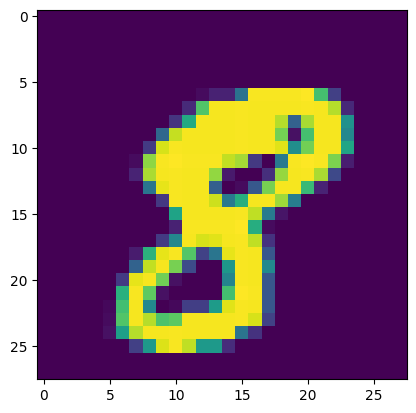

label -->8


In [3]:
import plotly.express as px
from matplotlib import pyplot as plt
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values
img = X[10].reshape(28,28)
plt.imshow(img)
plt.show()
print('label -->'+str(Y[10]))
Y=np.array(pd.get_dummies(Y))


In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


                                       ( MODEL SUMMARY )                                
        
               Layer        Activation Function     Output Shape           Params       

               Input               linear           (None, 784)              0          
        ----------------------------------------------------------------------------------

               Dense                tanh             (None, 10)             7850        
        ----------------------------------------------------------------------------------

               Output             softmax            (None, 10)             110         
        ----------------------------------------------------------------------------------


        Total Params (trainable) - 7960
        __________________________________________________________________________________
        
Loss: 1.00816166 =================> at epoch 1, elapse-time : 17.36261480 seconds
Loss: 0.68424784 =================> at epoch 

0.84

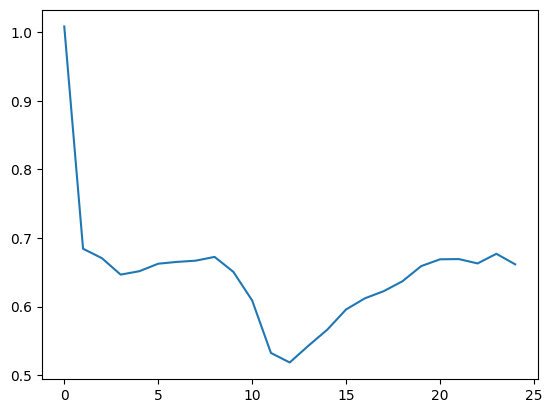

In [5]:
model = MultiLayerNeuralNetwork()
model.add_layer(784,input_layer=True)
model.add_layer(10,activation_function='tanh')
model.add_layer(10,activation_function='softmax',output_layer=True)
model.compile_model(loss_function='categorical_cross_entropy')
losses=model.fit(X_train, Y_train,learning_rate=0.001,epochs=25,batch_size=1,show_loss=True,early_stopping=False)
Y_pred = model.predict(X_test)
plt.plot(model.history['Losses'])
Y_p = np.argmax(Y_pred,axis=1)
Y_t= np.argmax(Y_test,axis=1)
accuracy_score(Y_t, Y_p)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
168/168 [==============================] - 3s 7ms/step - loss: 1.9428 - mse: 0.0792
Epoch 2/10
168/168 [==============================] - 1s 8ms/step - loss: 1.2622 - mse: 0.0560
Epoch 3/10
168/168 [==============================] - 1s 8ms/step - loss: 0.9819 - mse: 0.0437
Epoch 4/10
168/168 [==============================] - 1s 8ms/step - loss: 0.8373 - mse: 0.0372
Epoch 5/10
168/168 [==============================] - 1s 5ms/step - 

0.8360714285714286

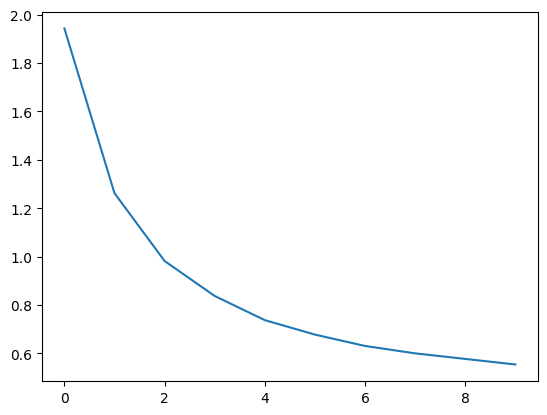

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10, activation='tanh', input_dim=784))
model.add(Dense(10, activation='softmax'))
model.compile(loss='CategoricalCrossentropy', metrics=['mse'])
model.summary()
history = model.fit(X_train, Y_train, epochs=10,verbose=1,batch_size=200)
Y_pred = model.predict(X_test)
plt.plot(history.history['loss'])
Y_p = np.argmax(Y_pred,axis=1)
Y_t= np.argmax(Y_test,axis=1)
accuracy_score(Y_t, Y_p)